In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import model_selection, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import (
    preprocessing,
    model_selection,
    pipeline,
    compose,
    metrics,
    tree,
    linear_model,
    feature_selection
    )
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df_raw = pd.read_csv("/content/sample_data/vin.csv")

# Nouvelle section

# Nouvelle section

In [ ]:
df_raw.head()


,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,Vin amer
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,Vin amer
2,2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,Vin amer
3,3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,Vin amer
4,4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,Vin amer


In [ ]:
df_raw = df_raw.drop(columns=["Unnamed: 0"])

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
df_raw.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [ ]:
df_raw.describe(include = "all")

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vin éuilibré
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,NaN
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,NaN
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,NaN
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,NaN
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,NaN
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,NaN


<Axes: xlabel='target'>

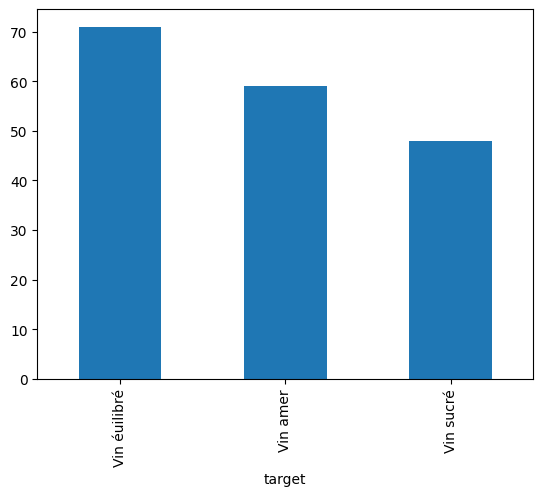

In [ ]:
df_raw['target'].value_counts().plot.bar()

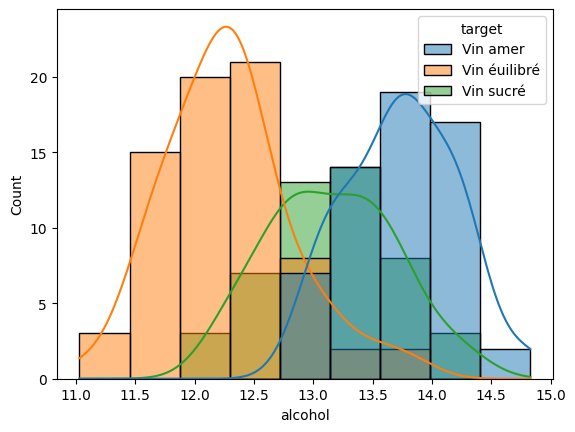

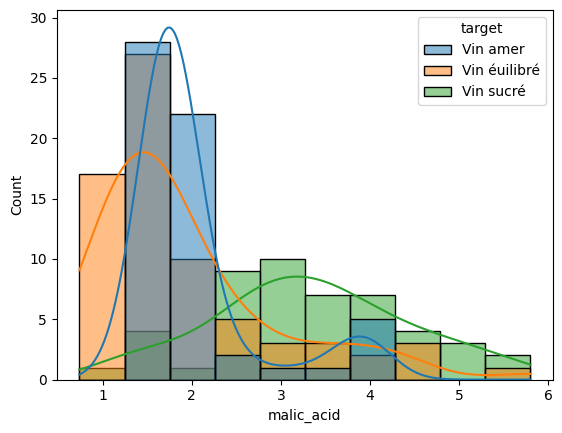

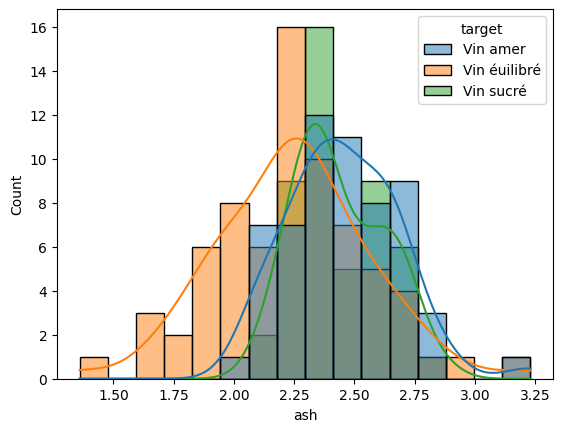

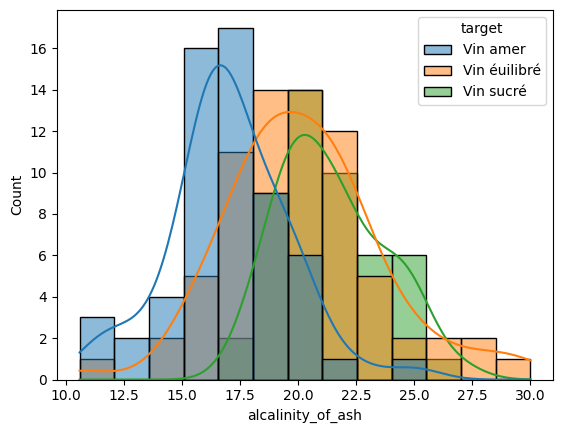

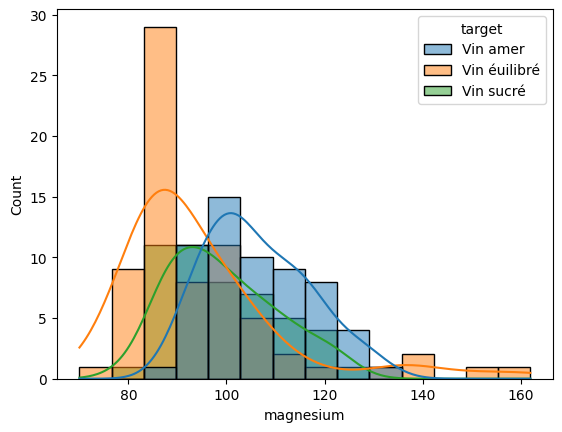

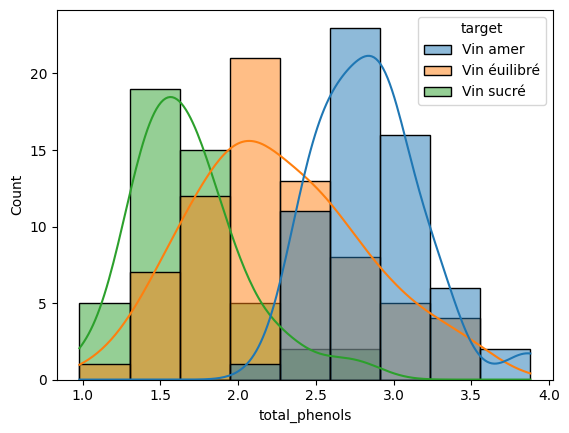

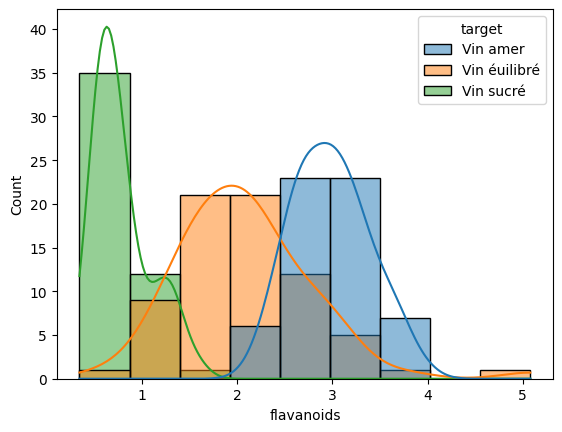

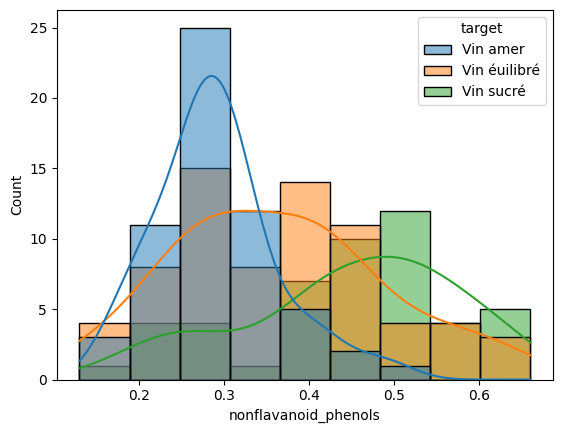

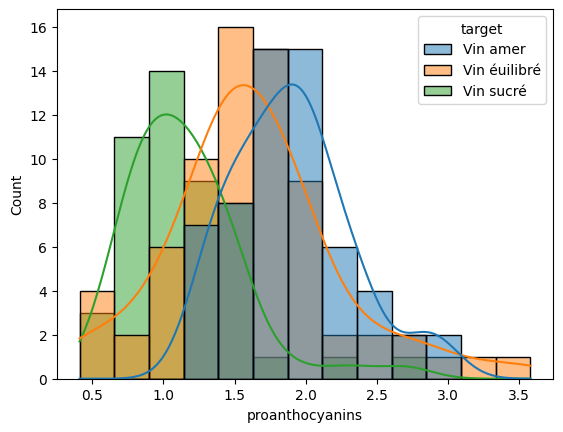

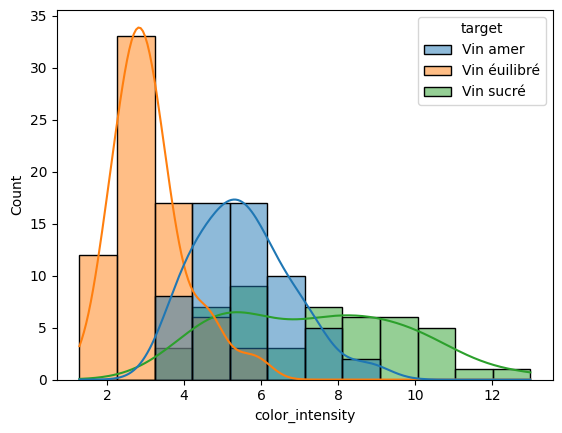

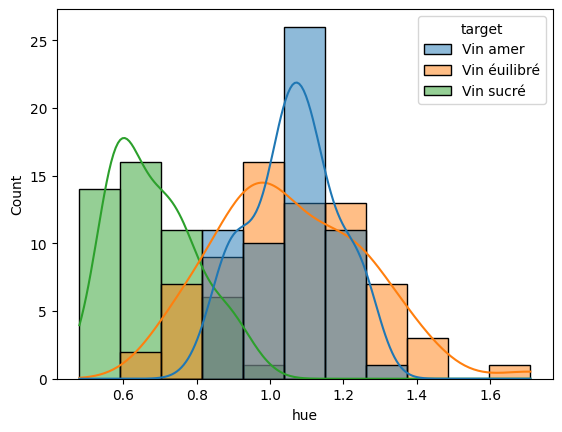

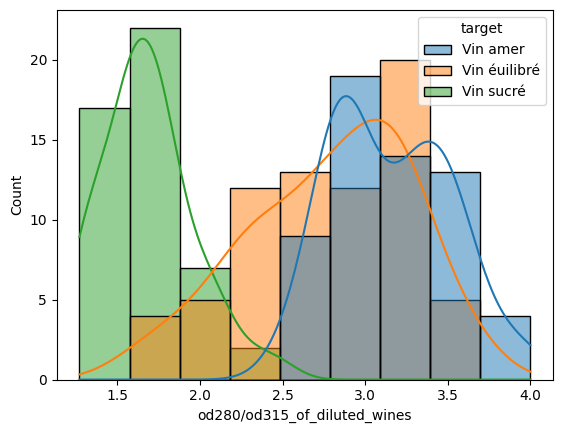

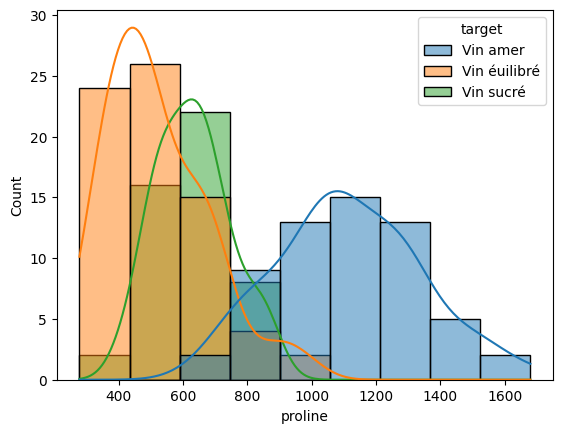

In [ ]:
num_cols = [col for col in df_raw.columns if col !="target"]
for col in num_cols:
  sns.histplot(
      data=df_raw,
      x=col,
      hue="target",
      kde=True,
  )
  plt.show()

In [ ]:
(
    df_raw["target"]
    .value_counts(
        normalize=True
    )
)

,proportion
target,
Vin éuilibré,0.398876
Vin amer,0.331461
Vin sucré,0.269663


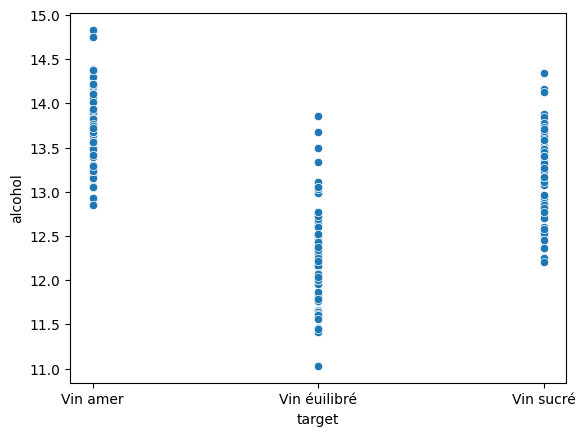

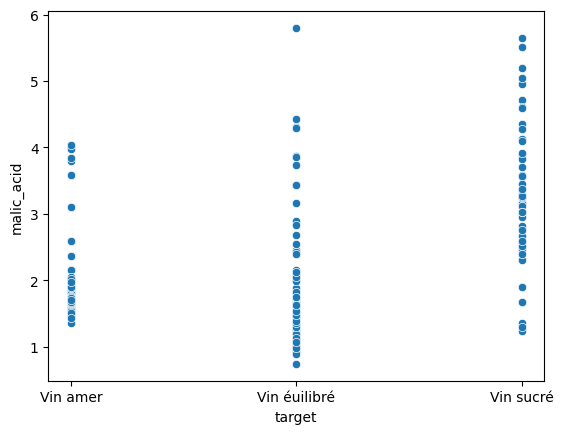

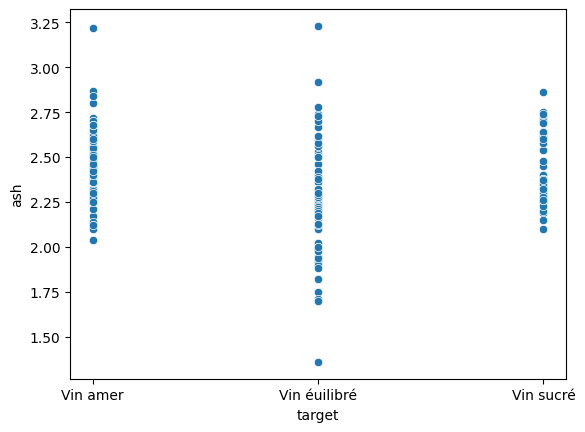

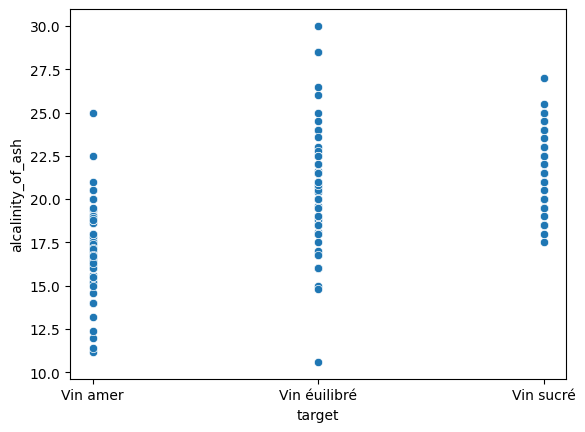

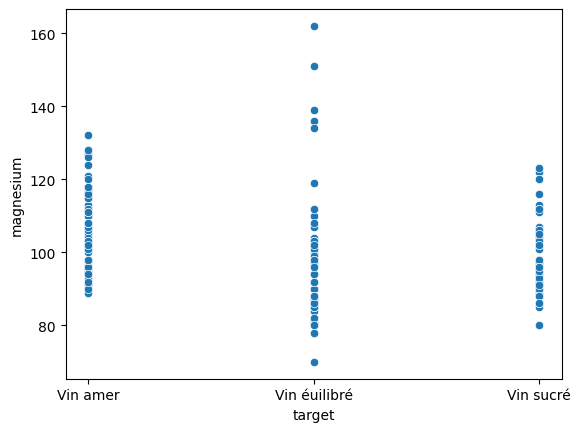

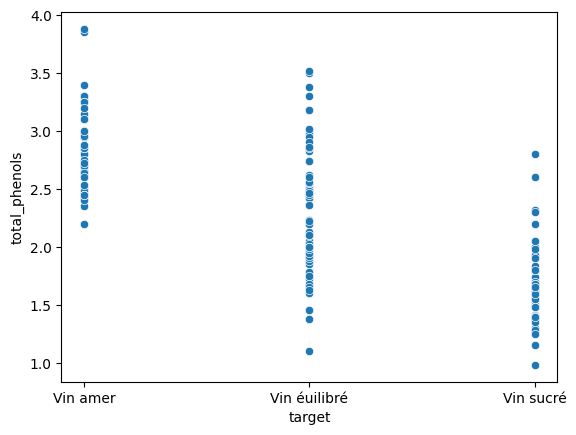

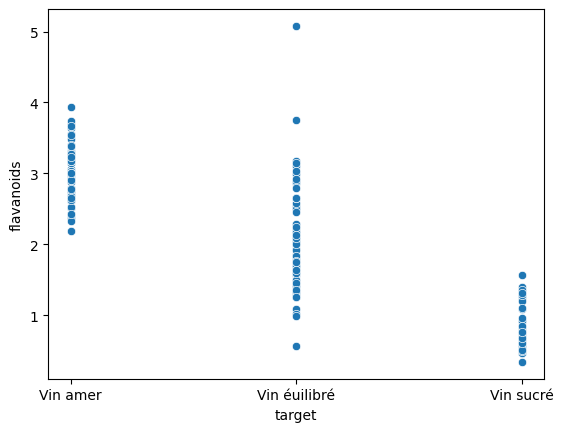

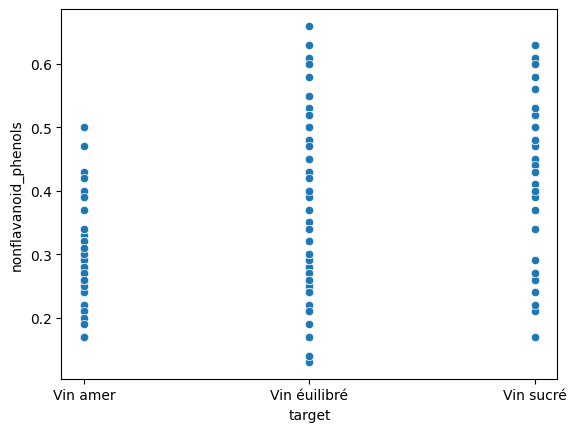

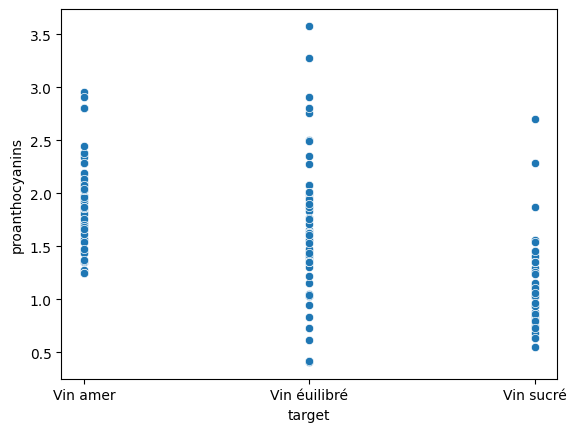

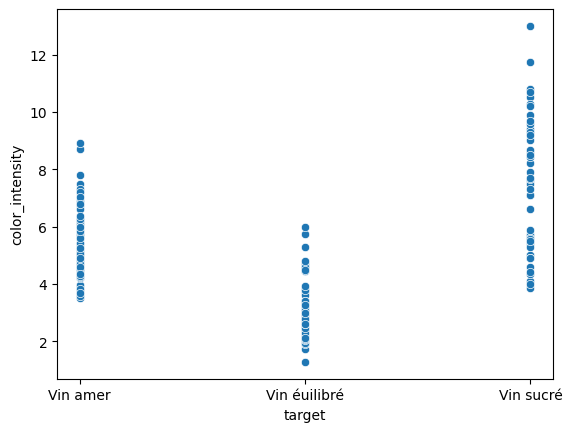

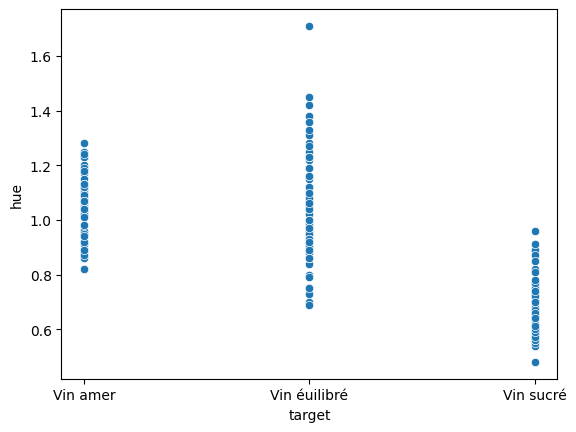

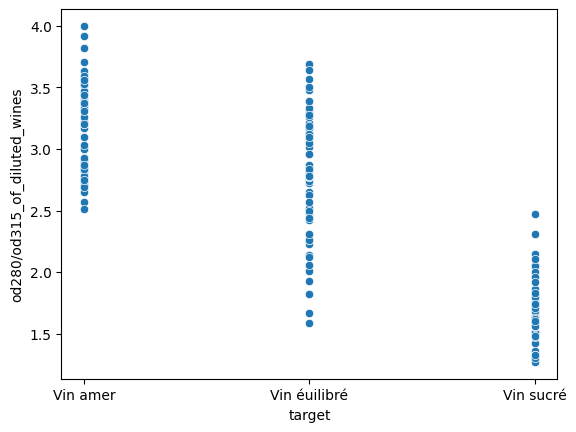

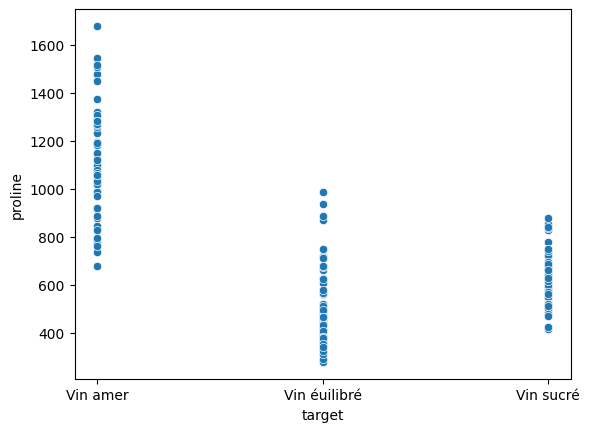

In [ ]:
focus_col = "target"

for col in num_cols:
  if col != focus_col:
    sns.scatterplot(
        data=df_raw,
        x=focus_col,
        y=col
    )
    plt.show()

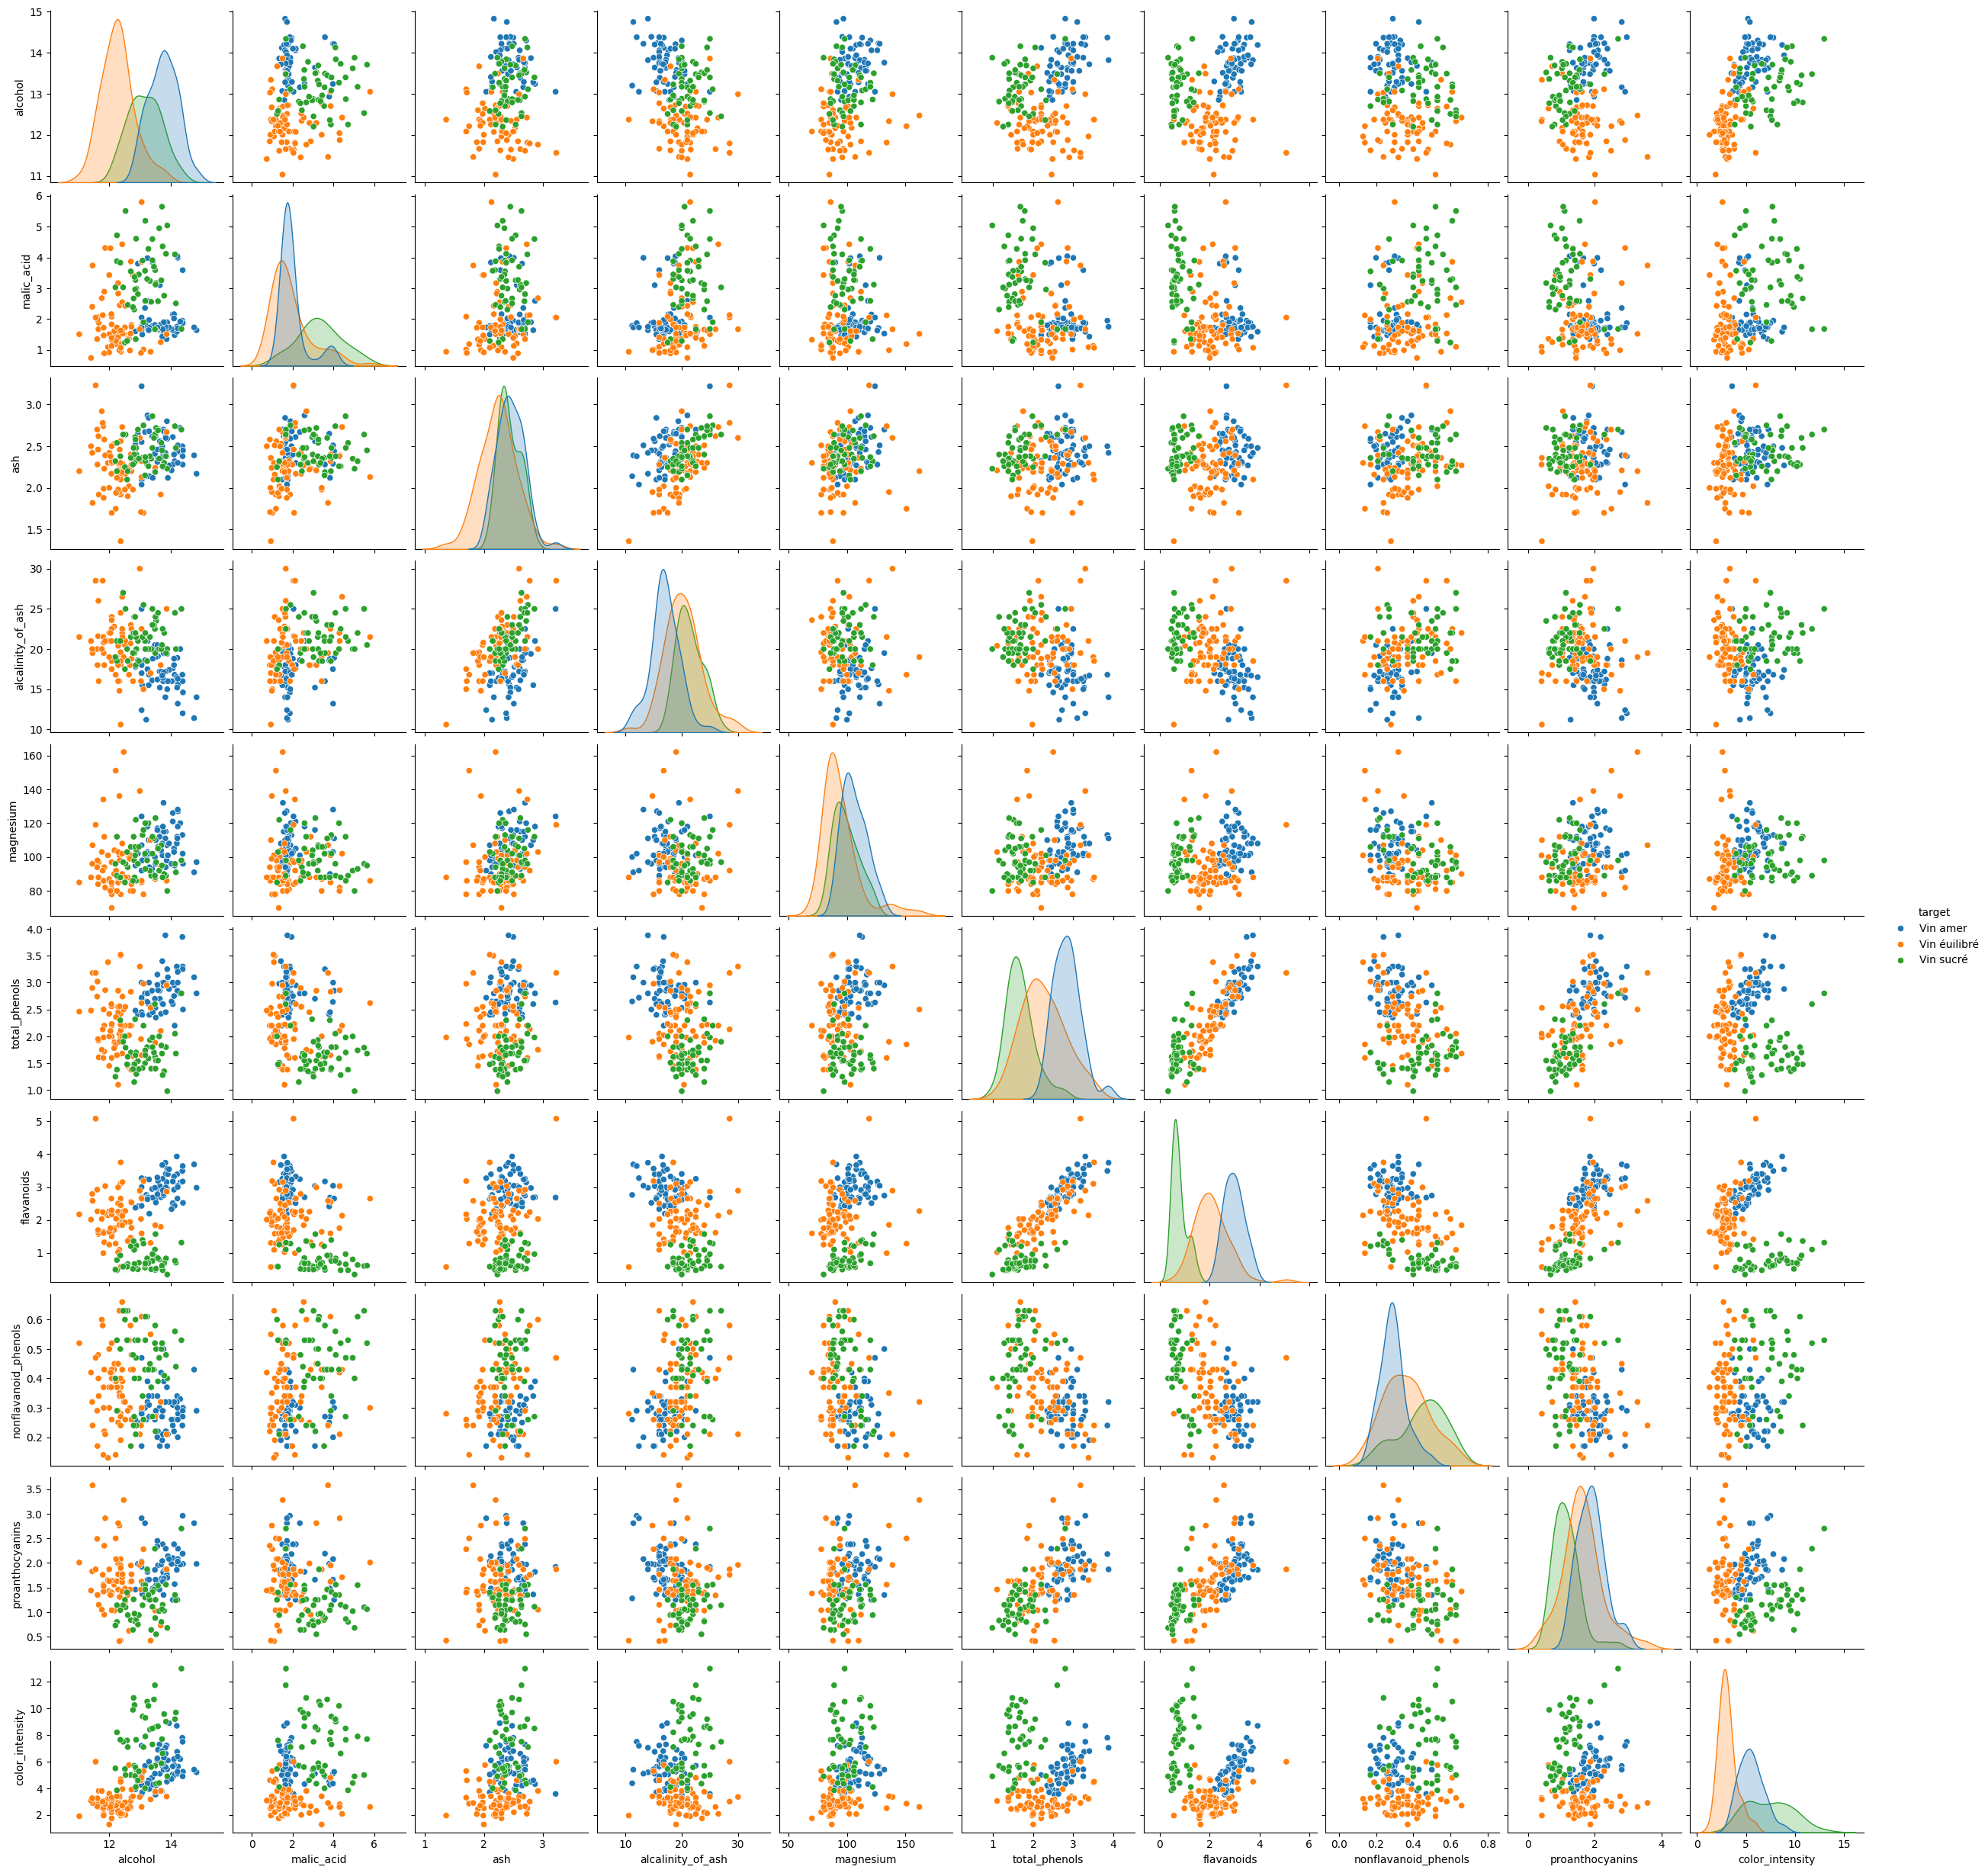

In [ ]:
pairplot_cols = num_cols[:10]
pairplot_cols.append("target")

sns.pairplot(
    df_raw[pairplot_cols],
    hue="target"
)

<Axes: >

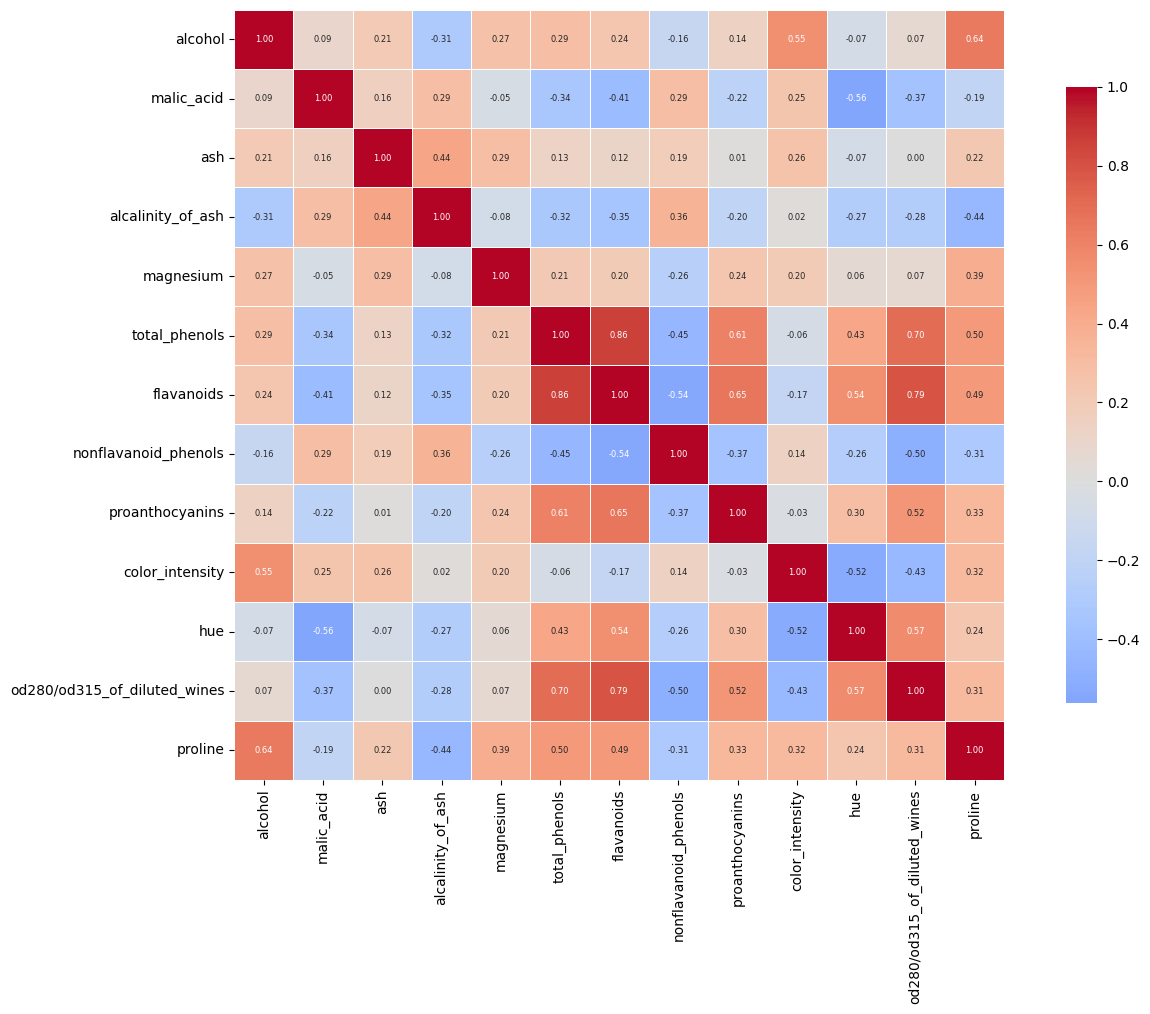

In [ ]:
corr = df_raw.drop("target", axis=1).corr()

plt.figure(figsize=(16, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 6}
)

In [ ]:
target = ["target"]
features = [col for col in df_raw.columns if col not in target]

X_train, X_test, y_train, y_test = (
    model_selection.train_test_split(
        df_raw[features],
        df_raw[target],
        test_size=0.2,
        random_state=42
    )
)

print("Taille train :", X_train.shape, " | Taille test :", X_test.shape)

Taille train : (142, 13)  | Taille test : (36, 13)


In [ ]:
y_test

,target
19,Vin amer
45,Vin amer
140,Vin sucré
30,Vin amer
67,Vin éuilibré
16,Vin amer
119,Vin éuilibré
174,Vin sucré
109,Vin éuilibré
141,Vin sucré


In [ ]:
y_test["target"].value_counts(normalize=True)

,proportion
target,
Vin amer,0.388889
Vin éuilibré,0.388889
Vin sucré,0.222222


In [ ]:
#Model = RandomForestClassifier(random_state=42)

In [ ]:
selected_features = [col for col in X_train.columns]

In [ ]:
feature_selection = compose.ColumnTransformer(transformers=[ ('select', 'passthrough', selected_features), ])

In [ ]:
pipe = pipeline.Pipeline([
    ("feature_selection", feature_selection),
    ('std_scaler', preprocessing.StandardScaler()),
    ('classifier', RandomForestClassifier())
])

In [ ]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('feature_selection',
                 ColumnTransformer(transformers=[('select', 'passthrough',
                                                  ['alcohol', 'malic_acid',
                                                   'ash', 'alcalinity_of_ash',
                                                   'magnesium', 'total_phenols',
                                                   'flavanoids',
                                                   'nonflavanoid_phenols',
                                                   'proanthocyanins',
                                                   'color_intensity', 'hue',
                                                   'od280/od315_of_diluted_wines',
                                                   'proline'])])),
                ('std_scaler', StandardScaler()),
                ('classifier', RandomForestClassifier())])

In [ ]:
print("Accuracy on train set =", pipe.score(X_train,y_train))
print("Accuracy on test set =", pipe.score(X_test,y_test))

Accuracy on train set = 1.0
Accuracy on test set = 1.0


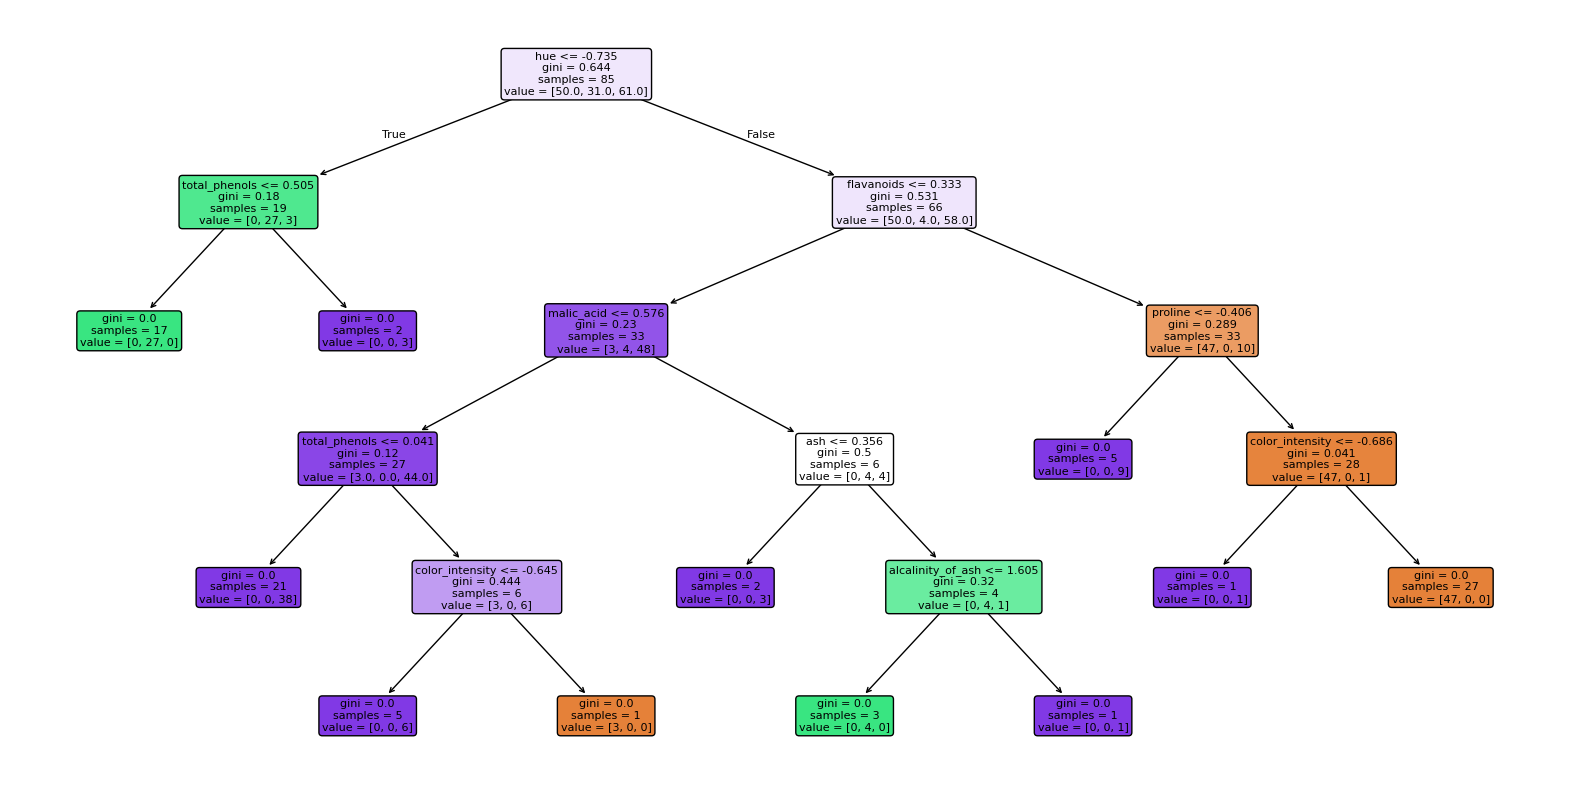

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# On prend un des arbres de la forêt, par exemple le premier
estimator = pipe[-1].estimators_[0]

plt.figure(figsize=(20,10))
tree.plot_tree(
    estimator,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.show()

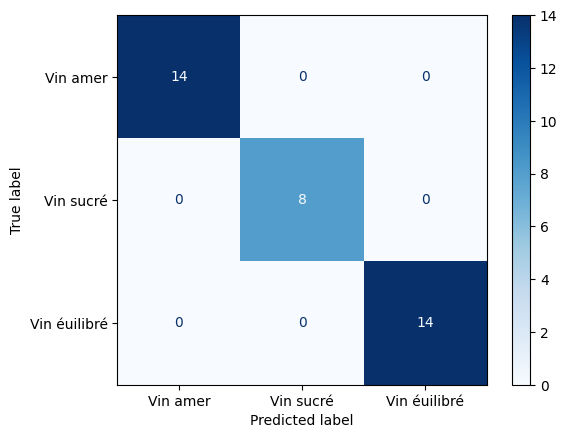

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pipe.predict(X_test), cmap="Blues")

In [ ]:
print(metrics.classification_report(y_train, pipe.predict(X_train)))

              precision    recall  f1-score   support

    Vin amer       1.00      1.00      1.00        45
   Vin sucré       1.00      1.00      1.00        40
Vin éuilibré       1.00      1.00      1.00        57

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



In [ ]:
print(metrics.classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

    Vin amer       1.00      1.00      1.00        14
   Vin sucré       1.00      1.00      1.00         8
Vin éuilibré       1.00      1.00      1.00        14

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [ ]:
####autre modèle
pipe = pipeline.Pipeline([
    ("feature_selection", feature_selection),
    ('std_scaler', preprocessing.StandardScaler()),
    (
        'decision_tree',
        tree.DecisionTreeClassifier(
            max_depth=3,
            max_leaf_nodes=5
        )
    )]
)

pipe.fit(X_train, y_train)

Pipeline(steps=[('feature_selection',
                 ColumnTransformer(transformers=[('select', 'passthrough',
                                                  ['alcohol', 'malic_acid',
                                                   'ash', 'alcalinity_of_ash',
                                                   'magnesium', 'total_phenols',
                                                   'flavanoids',
                                                   'nonflavanoid_phenols',
                                                   'proanthocyanins',
                                                   'color_intensity', 'hue',
                                                   'od280/od315_of_diluted_wines',
                                                   'proline'])])),
                ('std_scaler', StandardScaler()),
                ('decision_tree',
                 DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5))])